## Homework 01
---
Tópicos abordados:
- Conversão RGB para GRAY
- Modelo aditivo de ruído
- Filtragem espacial

**Imagem de referência**

A imagem contida na variável `rgb` do cógido abaixo em Python será a imagem de referência para este **Homework**. 



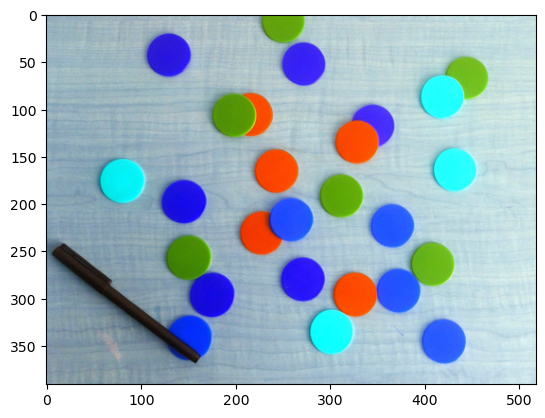

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#image_fname = "images/rgb.ppm";
image_fname = "images/coloredChips.png";


rgb = cv.imread( image_fname );

plt.imshow(rgb);


### **Questão 01)** Organização de imagens coloridas

Uma imagem colorida é comummente organizada em 3 matrizes, denominadas canais Red(R), Green(G) e Blue(B), cada uma representando a intensidade luminosa de sua cor correspondente. Assim, um *pixel* colorido é representado por um vetor de intensidades com os canais R, G e B. Na representação RGB, a intensidade de cada *pixel* varia de 0 a 255, sendo 0 a ausência de luminosidade e 255 o brilho máximo do canal. Escreva o código em Python que apresente as componentes R, G, e B da imagem `rgb` de referência. Use a função `subplot` do **Matplotlib** para criar uma linha com 4 imagens, sendo a primeira a imagem de referência e as três últimas os canais R, G e B, respectivamente.

In [7]:
rgb.shape

(391, 518, 3)

In [8]:
blue = rgb.copy()
blue[:,:,0:2]=0

green = rgb.copy()
green[:,:,0]=0
green[:,:,2]=0

red = rgb.copy()
red[:,:,1:3]=0

Text(0.5, 1.0, 'Canal Azul')

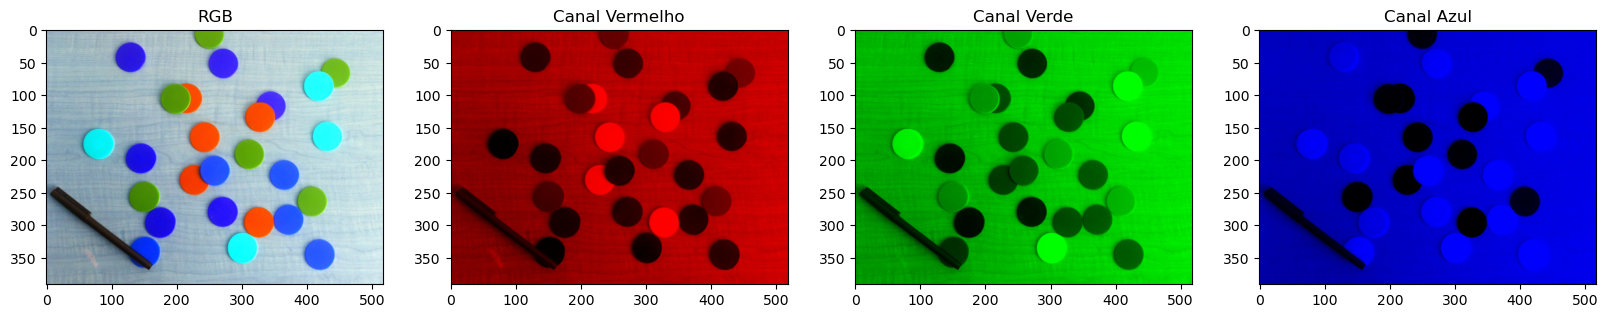

In [9]:
# Atente para a importação do pacote pyplot que já está disponível neste contexto como plt

# Coloque seu código aqui...

fig, ax = plt.subplots(1,4, figsize=(20,20))

ax[0].imshow(rgb)
ax[0].set_title('RGB')
ax[1].imshow(red)
ax[1].set_title('Canal Vermelho')
ax[2].imshow(green)
ax[2].set_title('Canal Verde')
ax[3].imshow(blue)
ax[3].set_title('Canal Azul')


### **Questão 02)** Imagem em escala de cinza

Uma imagem em escala de cinza é representada por uma única matriz que contém intensidade de luz do espectro visível para cada *pixel*. Desse modo, em termos mais simples, o valor de cinza de um *pixel* pode ser computado pela média aritmética dos canais R, G e B. Como os cones R, G e B possuem sensibilidades diferentes à luz, o valor de cinza que mais se aproxima da percepção humana é dado pela média ponderada dos canais R, G e B de acordo com a seguinte equação:

$$ gray = 0.2989 \cdot R + 0.5870 \cdot G + 0.1140 \cdot B $$

Para este tópico de estudo, implemente a funcao `rgb2gray` para converter uma imagem RGB e retornar a imagem correspondente em escala de cinza e compare com a função disponibilizada pela **OpenCV**. Ela disponibiliza a função `cv.cvtColor` que permite realizar a conversão em diversos espaços de cores. Crie duas imagens em escala de cinza, `gray` resultante da função `rgb2gray`, esta será a imagem de referência em escala de cinza, e a imagem `gray_cv`, resultante da função `cv.cvtColor`, em seguida, apresente uma linha com 3 figuras usando a biblioteca **Matplotlib**, sendo a primeira a imagem `gray`, a segunda a imagem `gray_cv` e a última uma imagem que contém a diferênça entre as duas imagens geradas.

*Obs.* Na biblioteca **OpenCV**, os *pixels* coloridos podem ser organizados na ordem RGB ou BGR, esse último por questões históricas e também por conveniência de representação numérica de números inteiros em memória. Desse modo, verifique o código de conversão adequado para a sua versão do **OpenCV** e escolha entre `COLOR_RGB2GRAY` e `COLOR_BGR2GRAY` observando a decomposição dos canais RGB na figura anterior.

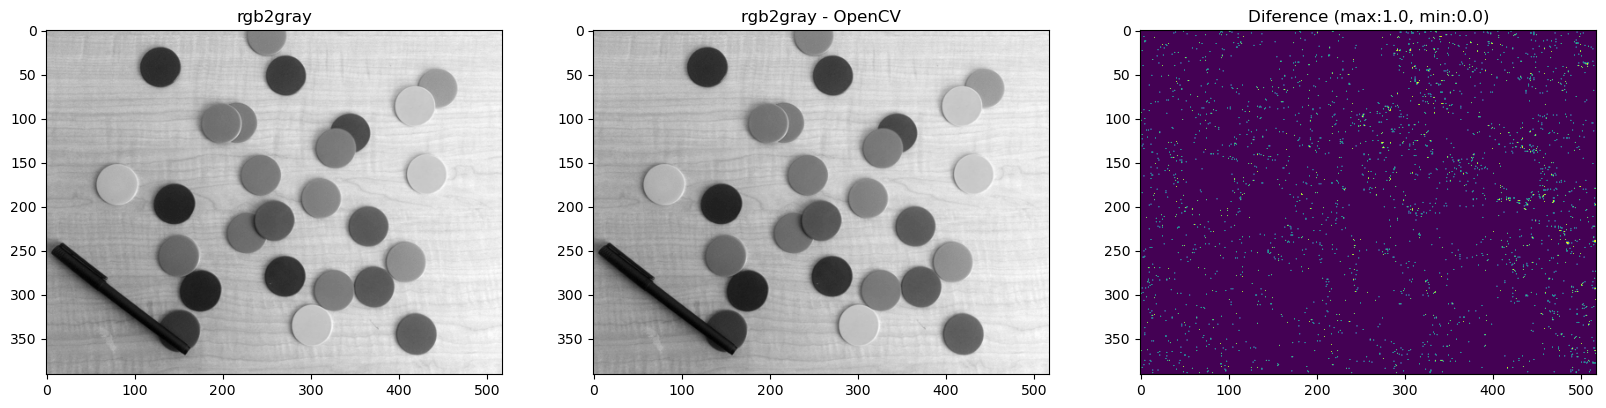

In [10]:
# Complete com seu código

def rgb2gray( rgb ) :
	"""
	rgb - imagem colorida no formato RGB com intensidades variando de 0 -- 255 para cada canal
	return - imagem em escala de cinza com intensidades variando de 0 -- 255
	"""
	converter = [0.2989, 0.5870, 0.1140]
	gray = rgb*converter
	gray = np.rint(np.sum(gray, axis=2))
	
	return gray

gray_cv = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY);
# gray_cv = cv.cvtColor(rgb, cv.COLOR_BGR2GRAY);
gray = rgb2gray(rgb);
# --- Apresentação do resultado --- #
plt.figure(figsize=(20,20));
# ---
plt.subplot(131)
plt.imshow(gray, cmap="gray");
plt.title("rgb2gray");
# ---
plt.subplot(132);
plt.imshow(gray_cv, cmap="gray");
plt.title("rgb2gray - OpenCV");
# ---
plt.subplot(133);
dif = np.abs(gray_cv-gray);
plt.imshow(dif);
tt = "Diference (max:" + str(np.max(dif)) + ", min:" + str(np.min(dif)) + ")";
plt.title(tt);

### **Questão 03)** Modelo de Ruído Aditivo

Implemente a função `build_uniform_noise_from_snr_db` que calcula o ruído uniforme a ser adicionado a uma imagem de referência que gere a relação SNRdb desejada. A função tem como entrada a relação sinal ruído em db (`SNRdb`), a potência do sinal de referência (`Ps`) e as dimensões do sinal a ser gerado (`shape`). Como acessório, implemente também a função `power` que retorna a potência de um sinal de entrada. Nomeie as imagens corrompidas por ruído como `gray_25db` e `gray_10db`.

A potência para um sinal discreto é calculado por:

$P = \frac{1}{T} \sum_{x=1}^N f^2[x]$

In [11]:
def power( signal ) :
	"""
	return Pw - Potência do sinal de entrada
	"""
	power = np.mean(signal**2)

	return 10*np.log10(power)

Para uma distribuição uniforme tem-se que:
   
$f(x) = 
     \begin{cases}
       \frac{1}{b-a} &, x\in{a\leq{}x\leq{}b} \\
       0 & \text{, c.c.}\\
     \end{cases}$
, Média: $\mu = \frac{a+b}{2}$ e Variância: $\sigma^2 = \frac{(b-a)^2}{12}$

E caso:

$a=-b$

$f(x) = 
     \begin{cases}
       \frac{1}{2b} &, x\in{-b\leq{}x\leq{}b} \\
       0 & \text{, c.c.}\\
     \end{cases}$
, Média: $\mu = 0$ e Variância: $\sigma^2 = \frac{b^2}{3}$

A variância para uma variável discreta aleatória:

$Var(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$

Como estamos considerando $a=-b$:

$Var(X) = \frac{1}{n} \sum_{i=1}^n x_i^2 = P$

Portanto, a potência do sinal é igual à variância. Com isso:

$P = \frac{b^2}{3} \implies b = \sqrt{3P}$ 


In [6]:
def build_uniform_noise_from_snr_db( SNRdb, Ps, shape ) :
	"""
	SNRdb - Relação sinal ruído em db
	Ps - Potência do sinal de referência
	shape - dimensões do sinal de ruído. Este deve ser idêntico ao sinal de referência para permitir a adição do ruído na próxima etapa.
	return N - Ruído gerado
	"""
	noise_power = 10**((Ps-SNRdb)/10)
	bounds = np.sqrt(noise_power*3)
	#noise = np.random.uniform(-noise_power, noise_power, shape)
	noise = np.random.uniform(-bounds, bounds, shape)

	return noise

**Apresentação do resultado**

Crie um código que apresenta os resultados da injeção de ruído uniforme de modo controlado na imagem de referência em escala de cinza `gray`.
Gere os ruídos uniformes de 25db e 10db em relação à imagem de referência e apresente o resultado como uma matriz de imagens.
A primeira linha deve conter a imagem de referência, a segunda a visualização do ruído 25db e, em seguida, o resultado da injeção do ruído na imagem.
A segunda linha deve conter, a partir da segunda coluna, a visualização do ruído de 10db e, em seguida, o resultado da injeção do ruído na imagem.

*Obs.* Atente-se ao fato que a injeção de ruído pode ferir o intervalo válido de 0-255. Para evitar problemas de visualização, atualize a imagem resultante de modo que todos os valores menores que zero sejam zerados e todos os maiores que 255 sejam 255.

In [7]:
Nu_25db = build_uniform_noise_from_snr_db(25, power(gray), gray.shape )
Nu_10db = build_uniform_noise_from_snr_db(10, power(gray), gray.shape )

# Codigo para remover valores fora da faixa de intensidades de pixels (0-255)
gray_25db = gray + Nu_25db
gray_25db[ gray_25db<0 ] = 0
gray_25db[ gray_25db>255 ] = 255
gray_25db = gray_25db.astype(np.uint8)

gray_10db = gray + Nu_10db
gray_10db[ gray_10db<0 ] = 0
gray_10db[ gray_10db>255 ] = 255
gray_10db = gray_10db.astype(np.uint8)

Text(0.5, 1.0, 'Additive Noise SNRdb: 10dB')

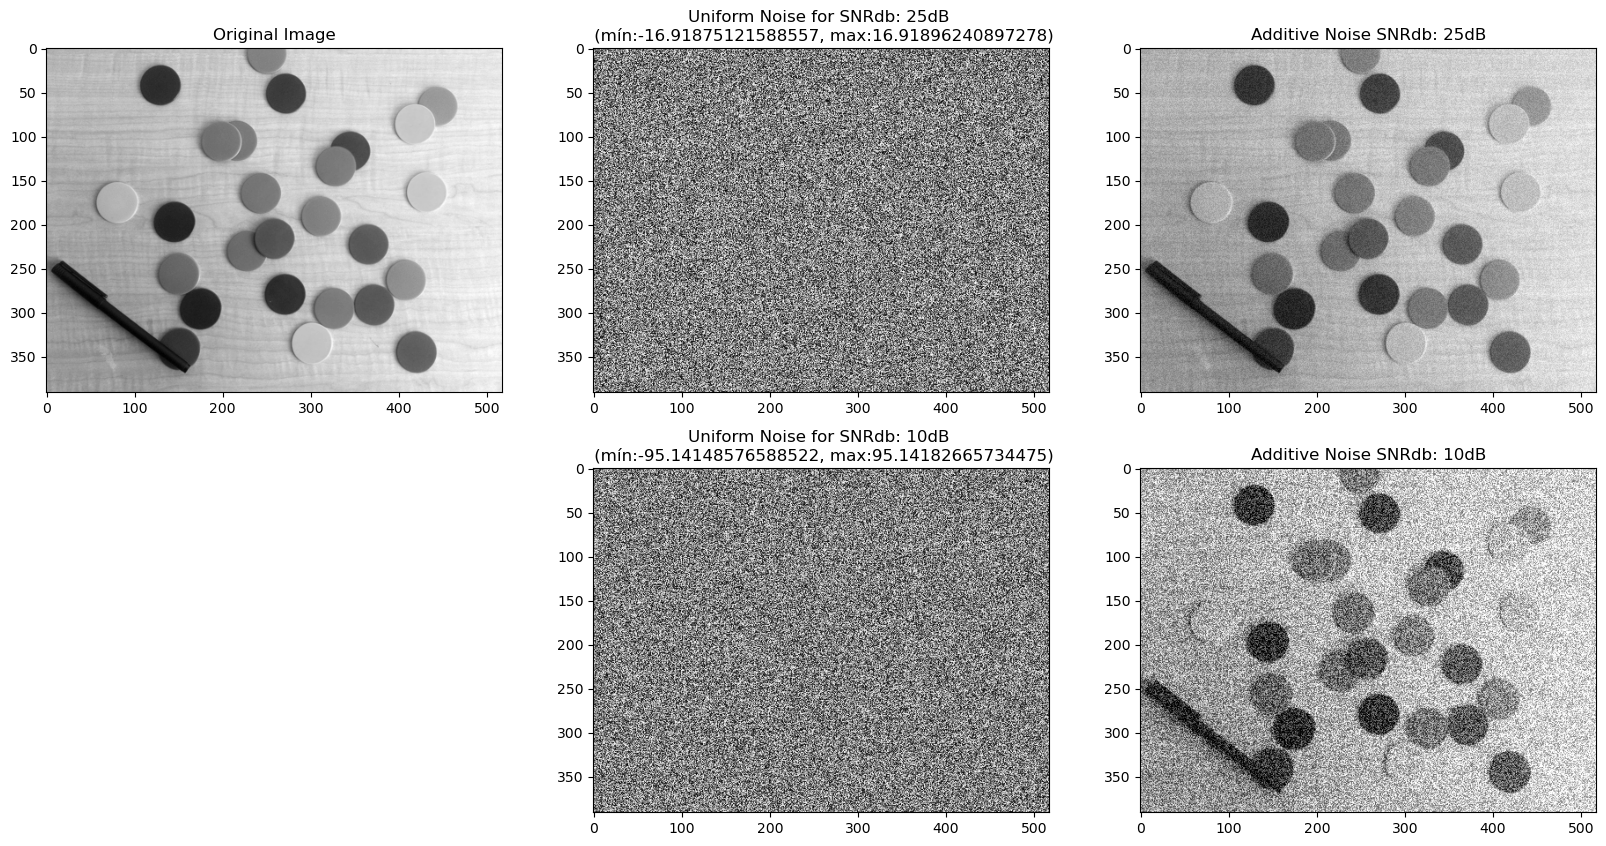

In [8]:
# --- Apresentação do resultado --- #
plt.figure(figsize=(20,10))
# ---
plt.subplot(231)
plt.imshow(gray, cmap="gray")
plt.title("Original Image")
# ---
plt.subplot(232)
plt.imshow(Nu_25db, cmap="gray")
plt.title("Uniform Noise for SNRdb: 25dB \n (mín:" + str(np.min(Nu_25db)) + ", max:" + str(np.max(Nu_25db)) + ")")
# ---
plt.subplot(233)
plt.imshow(gray_25db, cmap="gray")
plt.title("Additive Noise SNRdb: 25dB")
# ---
plt.subplot(235)
plt.imshow(Nu_10db, cmap="gray")
plt.title("Uniform Noise for SNRdb: 10dB \n (mín:" + str(np.min(Nu_10db)) + ", max:" + str(np.max(Nu_10db)) + ")")
# ---
plt.subplot(236)
plt.imshow(gray_10db, cmap="gray")
plt.title("Additive Noise SNRdb: 10dB")

### **Questão 04)** Filtragem

Codifique a aplicação do filtro gaussiano e filtro da mediana nas imagens corrompidas com ruído. Use uma janela $11\times 11$ para a aplicação dos filtros pedidos. Para o filtro gaussiano, use $\sigma=2.5$. Em seguida aplique o detector de bordas de Canny com limiares $th_{min}=50$ e $th_{max}=120$ nas as imagens filtradas e comente o resultado. Qual o efeito observado nas bordas quando comparados os dois tipos de filtragem.

**Apresentação do resultado**
Para cada tipo de filtro, apresente uma matriz $2\times 3$ de figuras, a primeira linha contendo o resultado da aplicação do filtro na imagem `gray`, na imagem `gray_25db` e na imagem `gray_10db`.

#### Avaliação do filtro Gaussiano

In [9]:
# Coloque seu código aqui ...
gray_gauss = cv.GaussianBlur(gray, (11,11), sigmaX=2.5)
gray_gauss = gray_gauss.astype(np.uint8)

gray_25db_gauss = cv.GaussianBlur(gray_25db, (11,11), sigmaX=2.5)
gray_25db_gauss = gray_25db_gauss.astype(np.uint8)

gray_10db_gauss = cv.GaussianBlur(gray_10db, (11,11), sigmaX=2.5)
gray_10db_gauss = gray_10db_gauss.astype(np.uint8)

gray_gauss_edges = cv.Canny(gray_gauss, 50, 120)
gray_25db_gauss_edges = cv.Canny(gray_25db_gauss, 50, 120)
gray_10db_gauss_edges = cv.Canny(gray_10db_gauss, 50, 120)

Text(0.5, 1.0, 'Additive Noise SNRdb: 10db\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120')

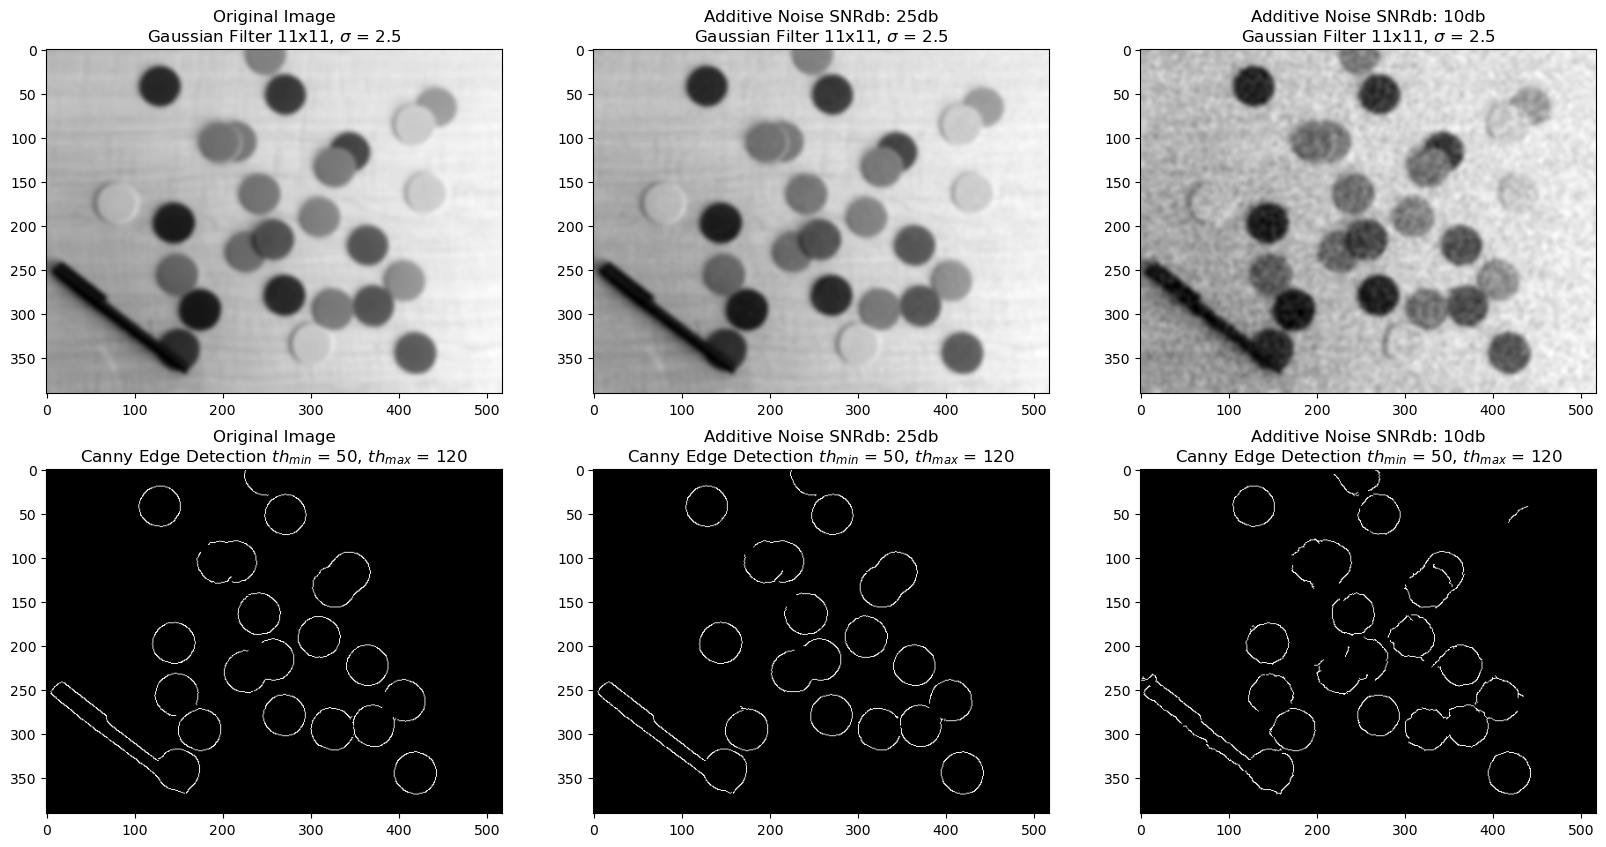

In [10]:
# --- Apresentação do resultado --- #
plt.figure(figsize=(20,10))
# ---
plt.subplot(231)
plt.imshow(gray_gauss, cmap="gray")
plt.title("Original Image\nGaussian Filter 11x11, $\sigma$ = 2.5")
# ---
plt.subplot(232)
plt.imshow(gray_25db_gauss, cmap="gray")
plt.title("Additive Noise SNRdb: 25db\nGaussian Filter 11x11, $\sigma$ = 2.5")
# ---
plt.subplot(233)
plt.imshow(gray_10db_gauss, cmap="gray")
plt.title("Additive Noise SNRdb: 10db\nGaussian Filter 11x11, $\sigma$ = 2.5")
# ---
plt.subplot(234)
plt.imshow(gray_gauss_edges, cmap="gray")
plt.title("Original Image\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120")
# ---
plt.subplot(235)
plt.imshow(gray_25db_gauss_edges, cmap="gray")
plt.title("Additive Noise SNRdb: 25db\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120")
# ---
plt.subplot(236)
plt.imshow(gray_10db_gauss_edges, cmap="gray")
plt.title("Additive Noise SNRdb: 10db\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120")

#### Avaliação do filtro da Mediana

In [11]:
# Coloque seu código aqui ...
gray = gray.astype(np.uint8)
gray_median = cv.medianBlur(gray, 11)
gray_median = gray_median.astype(np.uint8)

gray_25db_median = cv.medianBlur(gray_25db, 11)
gray_25db_median = gray_25db_median.astype(np.uint8)

gray_10db_median = cv.medianBlur(gray_10db, 11)
gray_10db_median = gray_10db_median.astype(np.uint8)

gray_median_edges = cv.Canny(gray_median, 50, 120)
gray_25db_median_edges = cv.Canny(gray_25db_median, 50, 120)
gray_10db_median_edges = cv.Canny(gray_10db_median, 50, 120)


Text(0.5, 1.0, 'Additive Noise SNRdb: 10db\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120')

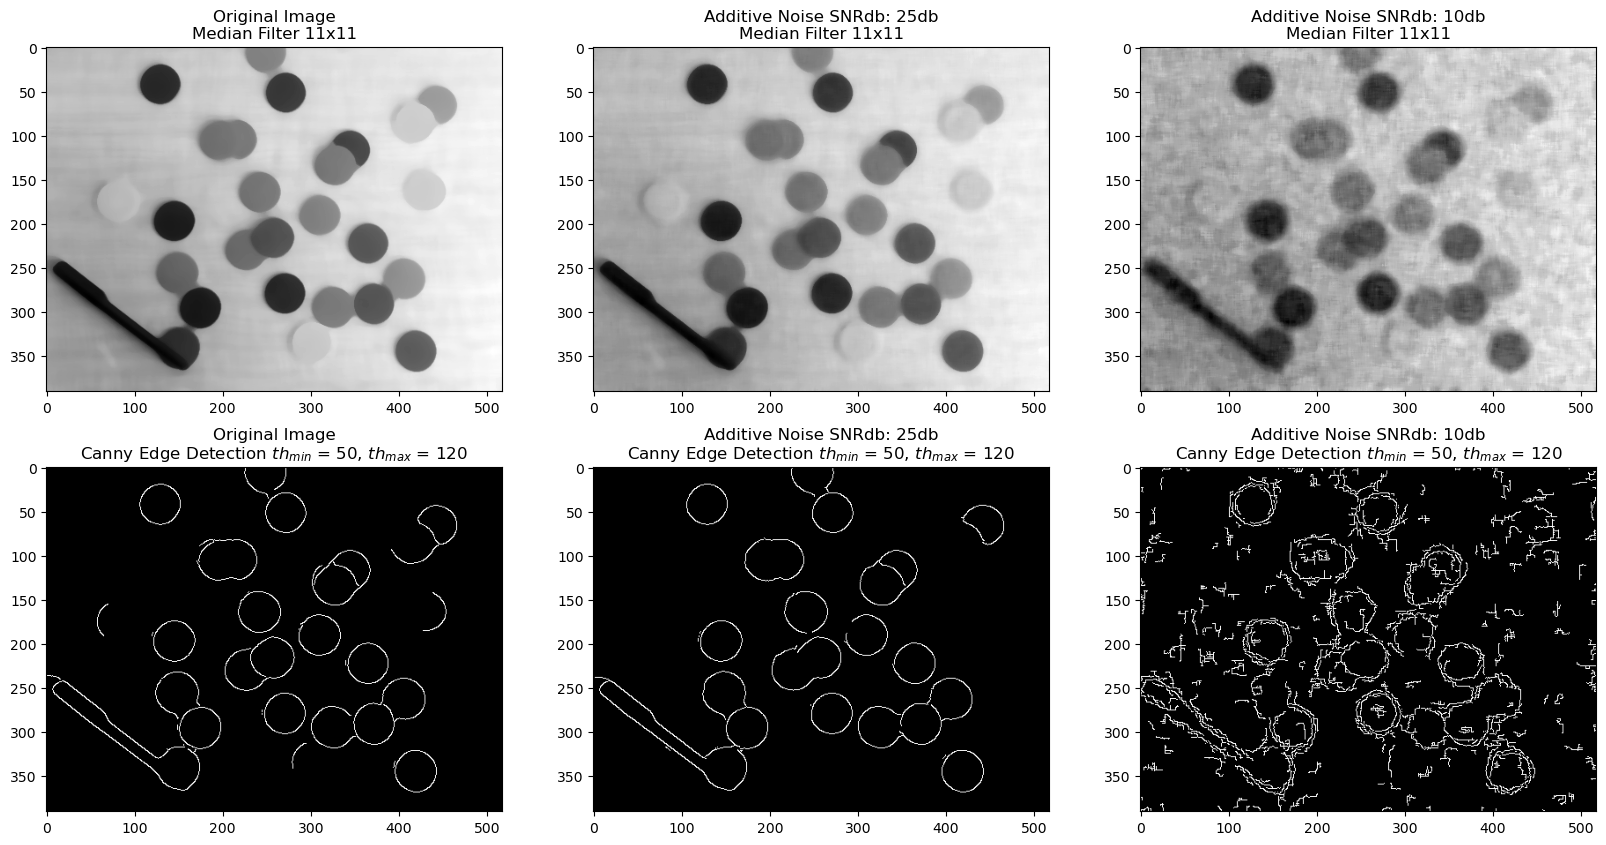

In [12]:
# --- Apresentação do resultado --- #
plt.figure(figsize=(20,10))
# ---
plt.subplot(231)
plt.imshow(gray_median, cmap="gray")
plt.title("Original Image\nMedian Filter 11x11")
# ---
plt.subplot(232)
plt.imshow(gray_25db_median, cmap="gray")
plt.title("Additive Noise SNRdb: 25db\nMedian Filter 11x11")
# ---
plt.subplot(233)
plt.imshow(gray_10db_median, cmap="gray")
plt.title("Additive Noise SNRdb: 10db\nMedian Filter 11x11")
# ---
plt.subplot(234)
plt.imshow(gray_median_edges, cmap="gray")
plt.title("Original Image\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120")
# ---
plt.subplot(235)
plt.imshow(gray_25db_median_edges, cmap="gray")
plt.title("Additive Noise SNRdb: 25db\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120")
# ---
plt.subplot(236)
plt.imshow(gray_10db_median_edges, cmap="gray")
plt.title("Additive Noise SNRdb: 10db\nCanny Edge Detection $th_{min}$ = 50, $th_{max}$ = 120")